# About Dataset


*The dataset contains eight attributes (or features, denoted by X1…X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.*


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings("ignore")
sns.set_theme()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate

# for visuallization

In [2]:
df0=pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [3]:
df=df0.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.price_range

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [7]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols
cat_cols, cat_but_car, num_cols=grab_col_names(df)
print('cat cols',cat_cols)
print('numeric cols',num_cols)

Observations: 2000
Variables: 21
cat_cols: 8
num_cols: 13
cat_but_car: 0
num_but_cat: 8
cat cols ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric cols ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [8]:
for cols in df.columns:
    print(cols+ "----->",df[cols].dtype)

battery_power-----> int64
blue-----> int64
clock_speed-----> float64
dual_sim-----> int64
fc-----> int64
four_g-----> int64
int_memory-----> int64
m_dep-----> float64
mobile_wt-----> int64
n_cores-----> int64
pc-----> int64
px_height-----> int64
px_width-----> int64
ram-----> int64
sc_h-----> int64
sc_w-----> int64
talk_time-----> int64
three_g-----> int64
touch_screen-----> int64
wifi-----> int64
price_range-----> int64


In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

      blue  Ratio
blue             
0     1010  50.50
1      990  49.50
          dual_sim  Ratio
dual_sim                 
1             1019  50.95
0              981  49.05
        four_g  Ratio
four_g               
1         1043  52.15
0          957  47.85
         n_cores  Ratio
n_cores                
4            274  13.70
7            259  12.95
8            256  12.80
2            247  12.35
3            246  12.30
5            246  12.30
1            242  12.10
6            230  11.50
         three_g  Ratio
three_g                
1           1523  76.15
0            477  23.85
              touch_screen  Ratio
touch_screen                     
1                     1006  50.30
0                      994  49.70
      wifi  Ratio
wifi             
1     1014  50.70
0      986  49.30
             price_range  Ratio
price_range                    
1                    500  25.00
2                    500  25.00
3                    500  25.00
0                    500  25.00


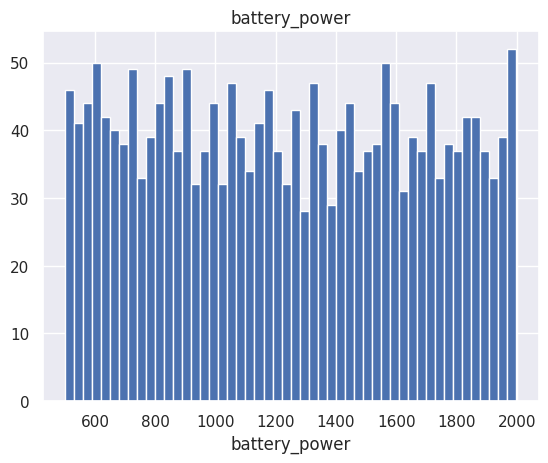

#####################################
count   2000.00
mean       0.49
std        0.50
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        0.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: blue, dtype: float64


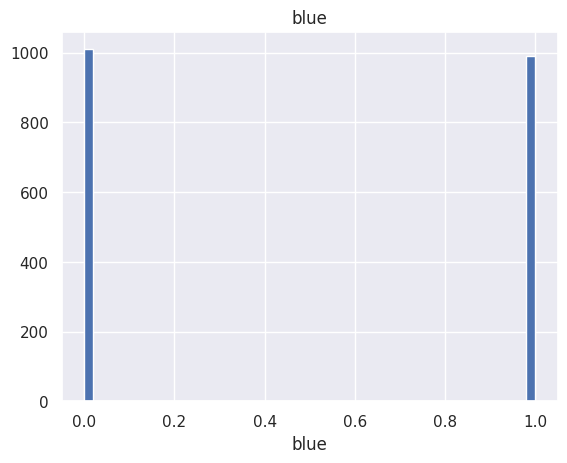

#####################################
count   2000.00
mean       1.52
std        0.82
min        0.50
5%         0.50
10%        0.50
20%        0.50
30%        0.80
40%        1.20
50%        1.50
60%        1.80
70%        2.10
80%        2.40
90%        2.70
95%        2.80
99%        3.00
max        3.00
Name: clock_speed, dtype: float64


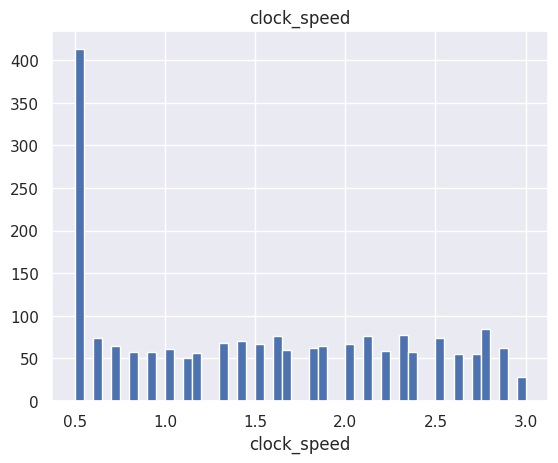

#####################################
count   2000.00
mean       0.51
std        0.50
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        1.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: dual_sim, dtype: float64


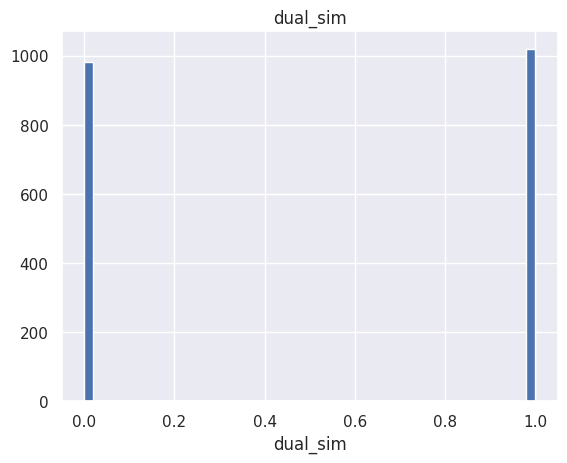

#####################################
count   2000.00
mean       4.31
std        4.34
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        1.00
40%        2.00
50%        3.00
60%        4.00
70%        6.00
80%        8.00
90%       11.00
95%       13.00
99%       16.00
max       19.00
Name: fc, dtype: float64


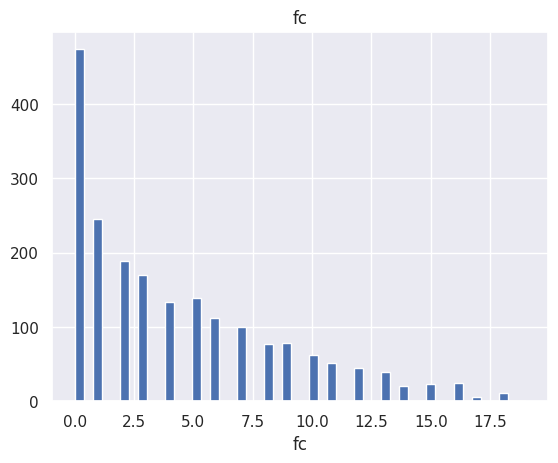

#####################################
count   2000.00
mean       0.52
std        0.50
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        1.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: four_g, dtype: float64


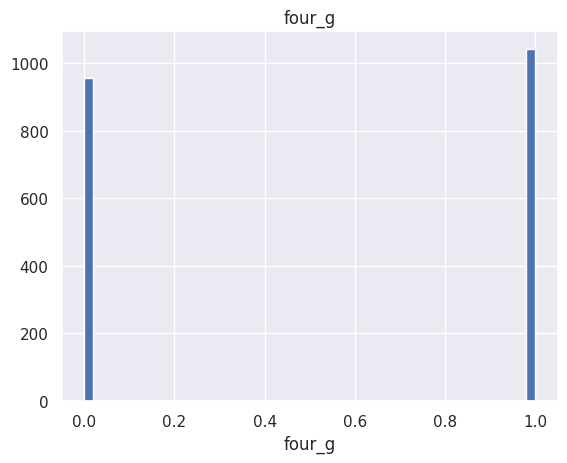

#####################################
count   2000.00
mean      32.05
std       18.15
min        2.00
5%         5.00
10%        7.90
20%       13.00
30%       19.00
40%       25.00
50%       32.00
60%       38.00
70%       44.00
80%       51.00
90%       57.00
95%       61.00
99%       64.00
max       64.00
Name: int_memory, dtype: float64


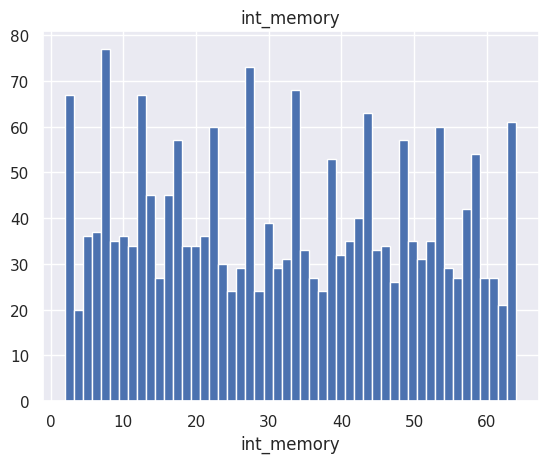

#####################################
count   2000.00
mean       0.50
std        0.29
min        0.10
5%         0.10
10%        0.10
20%        0.20
30%        0.30
40%        0.40
50%        0.50
60%        0.60
70%        0.70
80%        0.80
90%        0.90
95%        1.00
99%        1.00
max        1.00
Name: m_dep, dtype: float64


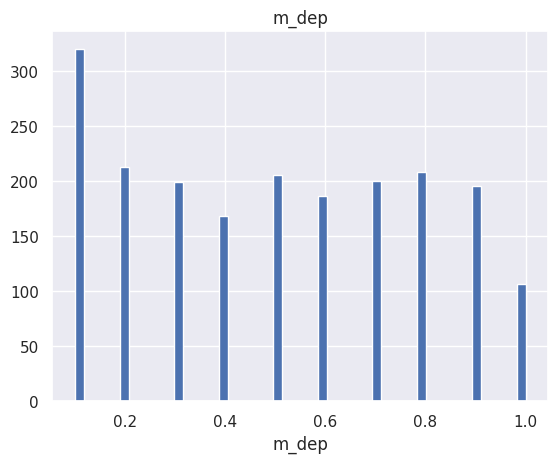

#####################################
count   2000.00
mean     140.25
std       35.40
min       80.00
5%        86.00
10%       91.00
20%      103.00
30%      114.00
40%      128.00
50%      141.00
60%      153.00
70%      164.00
80%      178.00
90%      189.00
95%      196.00
99%      199.00
max      200.00
Name: mobile_wt, dtype: float64


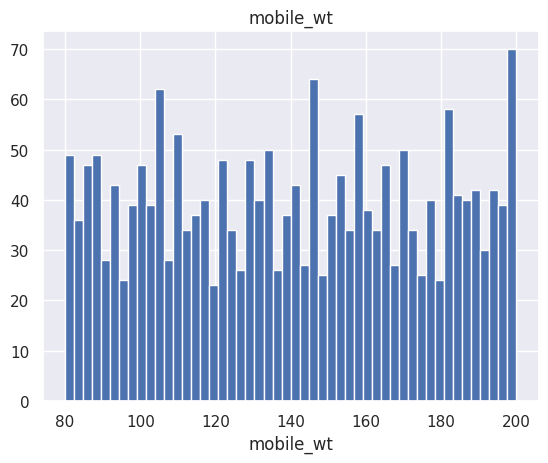

#####################################
count   2000.00
mean       4.52
std        2.29
min        1.00
5%         1.00
10%        1.00
20%        2.00
30%        3.00
40%        4.00
50%        4.00
60%        5.00
70%        6.00
80%        7.00
90%        8.00
95%        8.00
99%        8.00
max        8.00
Name: n_cores, dtype: float64


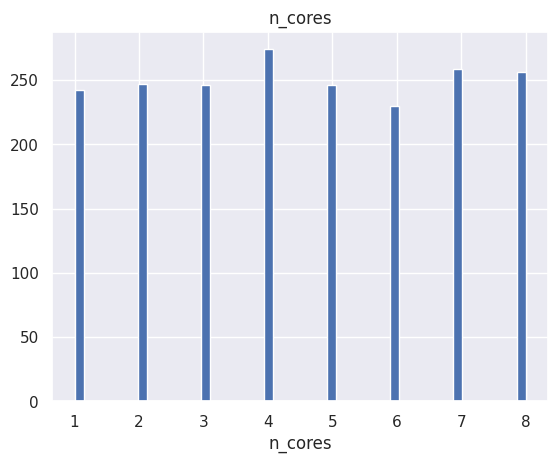

#####################################
count   2000.00
mean       9.92
std        6.06
min        0.00
5%         0.00
10%        1.00
20%        4.00
30%        6.00
40%        8.00
50%       10.00
60%       12.00
70%       14.00
80%       16.00
90%       18.00
95%       20.00
99%       20.00
max       20.00
Name: pc, dtype: float64


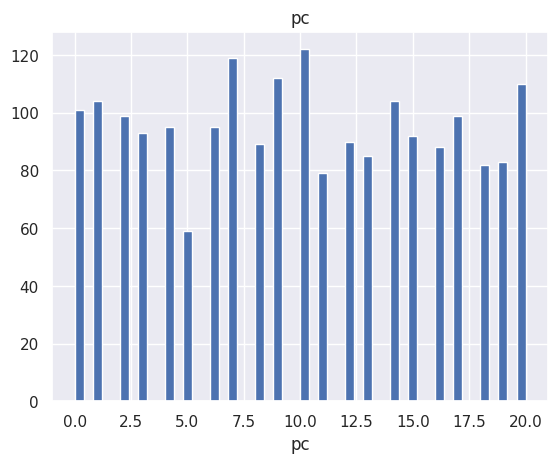

#####################################
count   2000.00
mean     645.11
std      443.78
min        0.00
5%        70.95
10%      125.90
20%      225.80
30%      334.00
40%      442.00
50%      564.00
60%      690.40
70%      854.00
80%     1050.40
90%     1285.00
95%     1485.05
99%     1791.01
max     1960.00
Name: px_height, dtype: float64


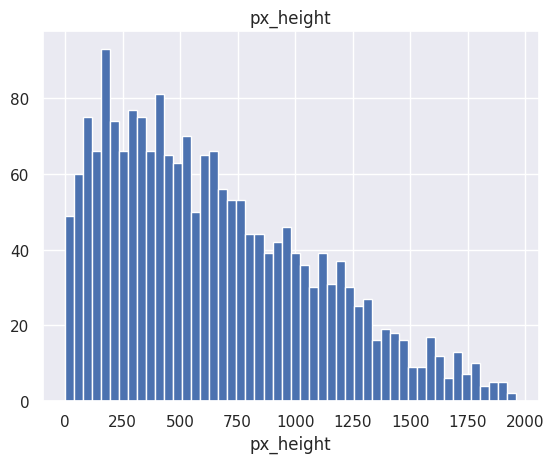

#####################################
count   2000.00
mean    1251.52
std      432.20
min      500.00
5%       579.85
10%      661.90
20%      806.80
30%      955.40
40%     1102.20
50%     1247.00
60%     1393.00
70%     1545.00
80%     1704.20
90%     1854.00
95%     1929.05
99%     1987.00
max     1998.00
Name: px_width, dtype: float64


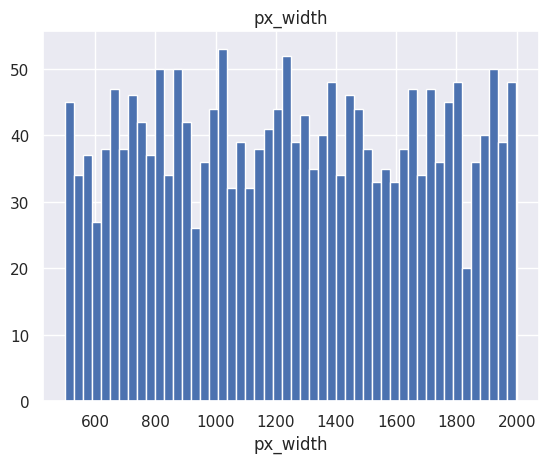

#####################################
count   2000.00
mean    2124.21
std     1084.73
min      256.00
5%       445.00
10%      605.80
20%     1016.00
30%     1369.70
40%     1742.60
50%     2146.50
60%     2485.20
70%     2844.90
80%     3256.60
90%     3637.70
95%     3826.35
99%     3958.01
max     3998.00
Name: ram, dtype: float64


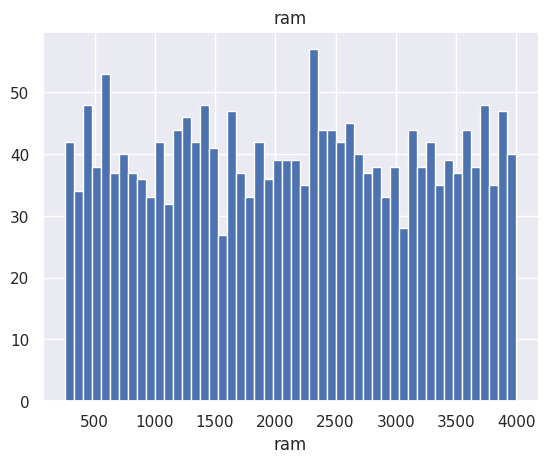

#####################################
count   2000.00
mean      12.31
std        4.21
min        5.00
5%         6.00
10%        6.00
20%        8.00
30%        9.00
40%       11.00
50%       12.00
60%       14.00
70%       15.00
80%       17.00
90%       18.00
95%       19.00
99%       19.00
max       19.00
Name: sc_h, dtype: float64


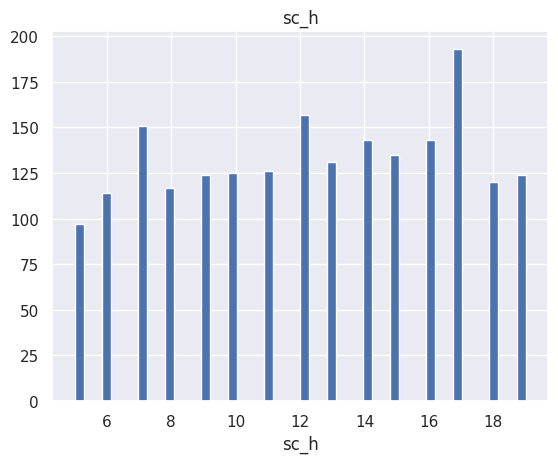

#####################################
count   2000.00
mean       5.77
std        4.36
min        0.00
5%         0.00
10%        1.00
20%        2.00
30%        3.00
40%        4.00
50%        5.00
60%        6.00
70%        8.00
80%       10.00
90%       12.00
95%       14.00
99%       17.00
max       18.00
Name: sc_w, dtype: float64


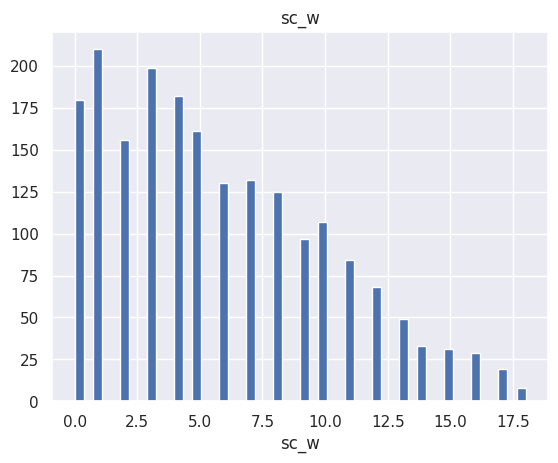

#####################################
count   2000.00
mean      11.01
std        5.46
min        2.00
5%         3.00
10%        4.00
20%        5.00
30%        7.00
40%        9.00
50%       11.00
60%       13.00
70%       15.00
80%       17.00
90%       19.00
95%       20.00
99%       20.00
max       20.00
Name: talk_time, dtype: float64


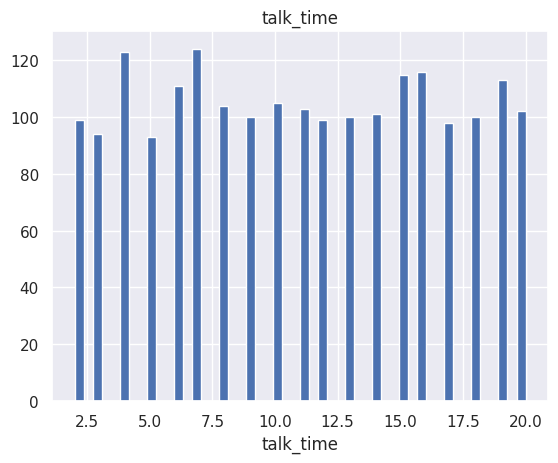

#####################################
count   2000.00
mean       0.76
std        0.43
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        1.00
40%        1.00
50%        1.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: three_g, dtype: float64


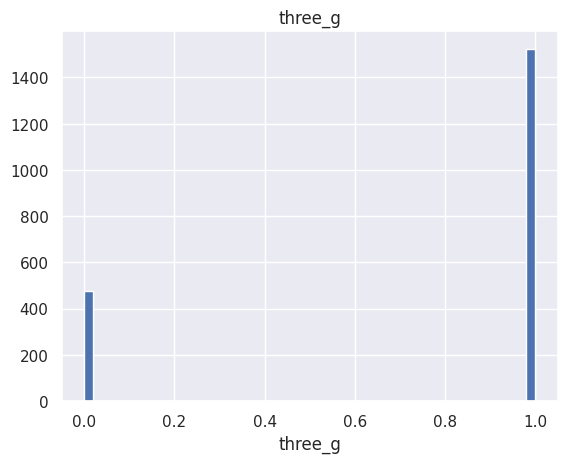

#####################################
count   2000.00
mean       0.50
std        0.50
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        1.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: touch_screen, dtype: float64


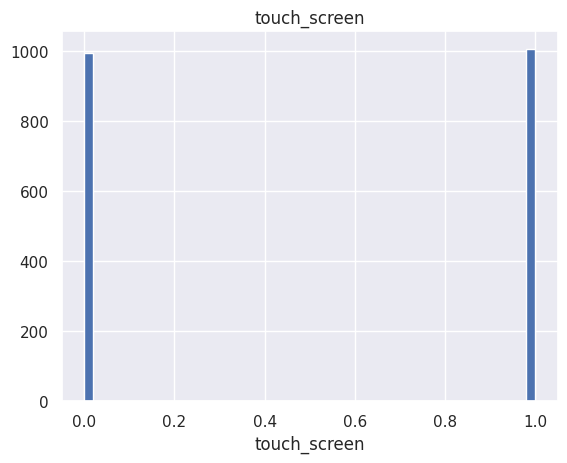

#####################################
count   2000.00
mean       0.51
std        0.50
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        0.00
40%        0.00
50%        1.00
60%        1.00
70%        1.00
80%        1.00
90%        1.00
95%        1.00
99%        1.00
max        1.00
Name: wifi, dtype: float64


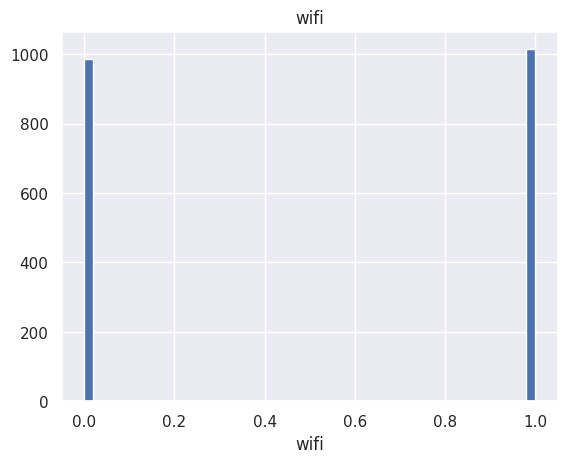

#####################################
count   2000.00
mean       1.50
std        1.12
min        0.00
5%         0.00
10%        0.00
20%        0.00
30%        1.00
40%        1.00
50%        1.50
60%        2.00
70%        2.00
80%        3.00
90%        3.00
95%        3.00
99%        3.00
max        3.00
Name: price_range, dtype: float64


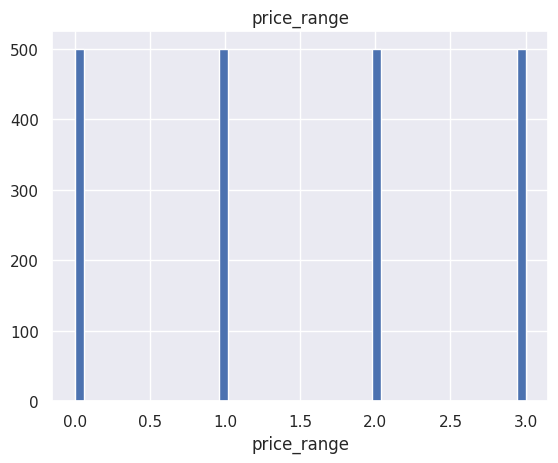

#####################################


In [10]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


def num_summary(dataframe, numerical_col, plot=True):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

    print("#####################################")

for col in cat_cols:
    cat_summary(df,col)

    
for col in df.columns:
    num_summary(df,col)

## blue ,dualsim_threeg,wifi : binary_cols

In [11]:
def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
for col in num_cols:
    if col!='price_range':
      print(col, check_outlier(df, col))


battery_power False
clock_speed False
fc False
int_memory False
m_dep False
mobile_wt False
pc False
px_height False
px_width False
ram False
sc_h False
sc_w False
talk_time False


In [12]:

corr=df[num_cols].corr().round(2)
corr


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.00,0.01,0.03,-0.00,0.03,0.00,0.03,0.01,-0.01,-0.00,-0.03,-0.02,0.05
clock_speed,0.01,1.00,-0.00,0.01,-0.01,0.01,-0.01,-0.01,-0.01,0.00,-0.03,-0.01,-0.01
fc,0.03,-0.00,1.00,-0.03,-0.00,0.02,0.64,-0.01,-0.01,0.02,-0.01,-0.01,-0.01
int_memory,-0.00,0.01,-0.03,1.00,0.01,-0.03,-0.03,0.01,-0.01,0.03,0.04,0.01,-0.00
m_dep,0.03,-0.01,-0.00,0.01,1.00,0.02,0.03,0.03,0.02,-0.01,-0.03,-0.02,0.02
mobile_wt,0.00,0.01,0.02,-0.03,0.02,1.00,0.02,0.00,0.00,-0.00,-0.03,-0.02,0.01
pc,0.03,-0.01,0.64,-0.03,0.03,0.02,1.00,-0.02,0.00,0.03,0.00,-0.02,0.01
px_height,0.01,-0.01,-0.01,0.01,0.03,0.00,-0.02,1.00,0.51,-0.02,0.06,0.04,-0.01
px_width,-0.01,-0.01,-0.01,-0.01,0.02,0.00,0.00,0.51,1.00,0.00,0.02,0.03,0.01
ram,-0.00,0.00,0.02,0.03,-0.01,-0.00,0.03,-0.02,0.00,1.00,0.02,0.04,0.01


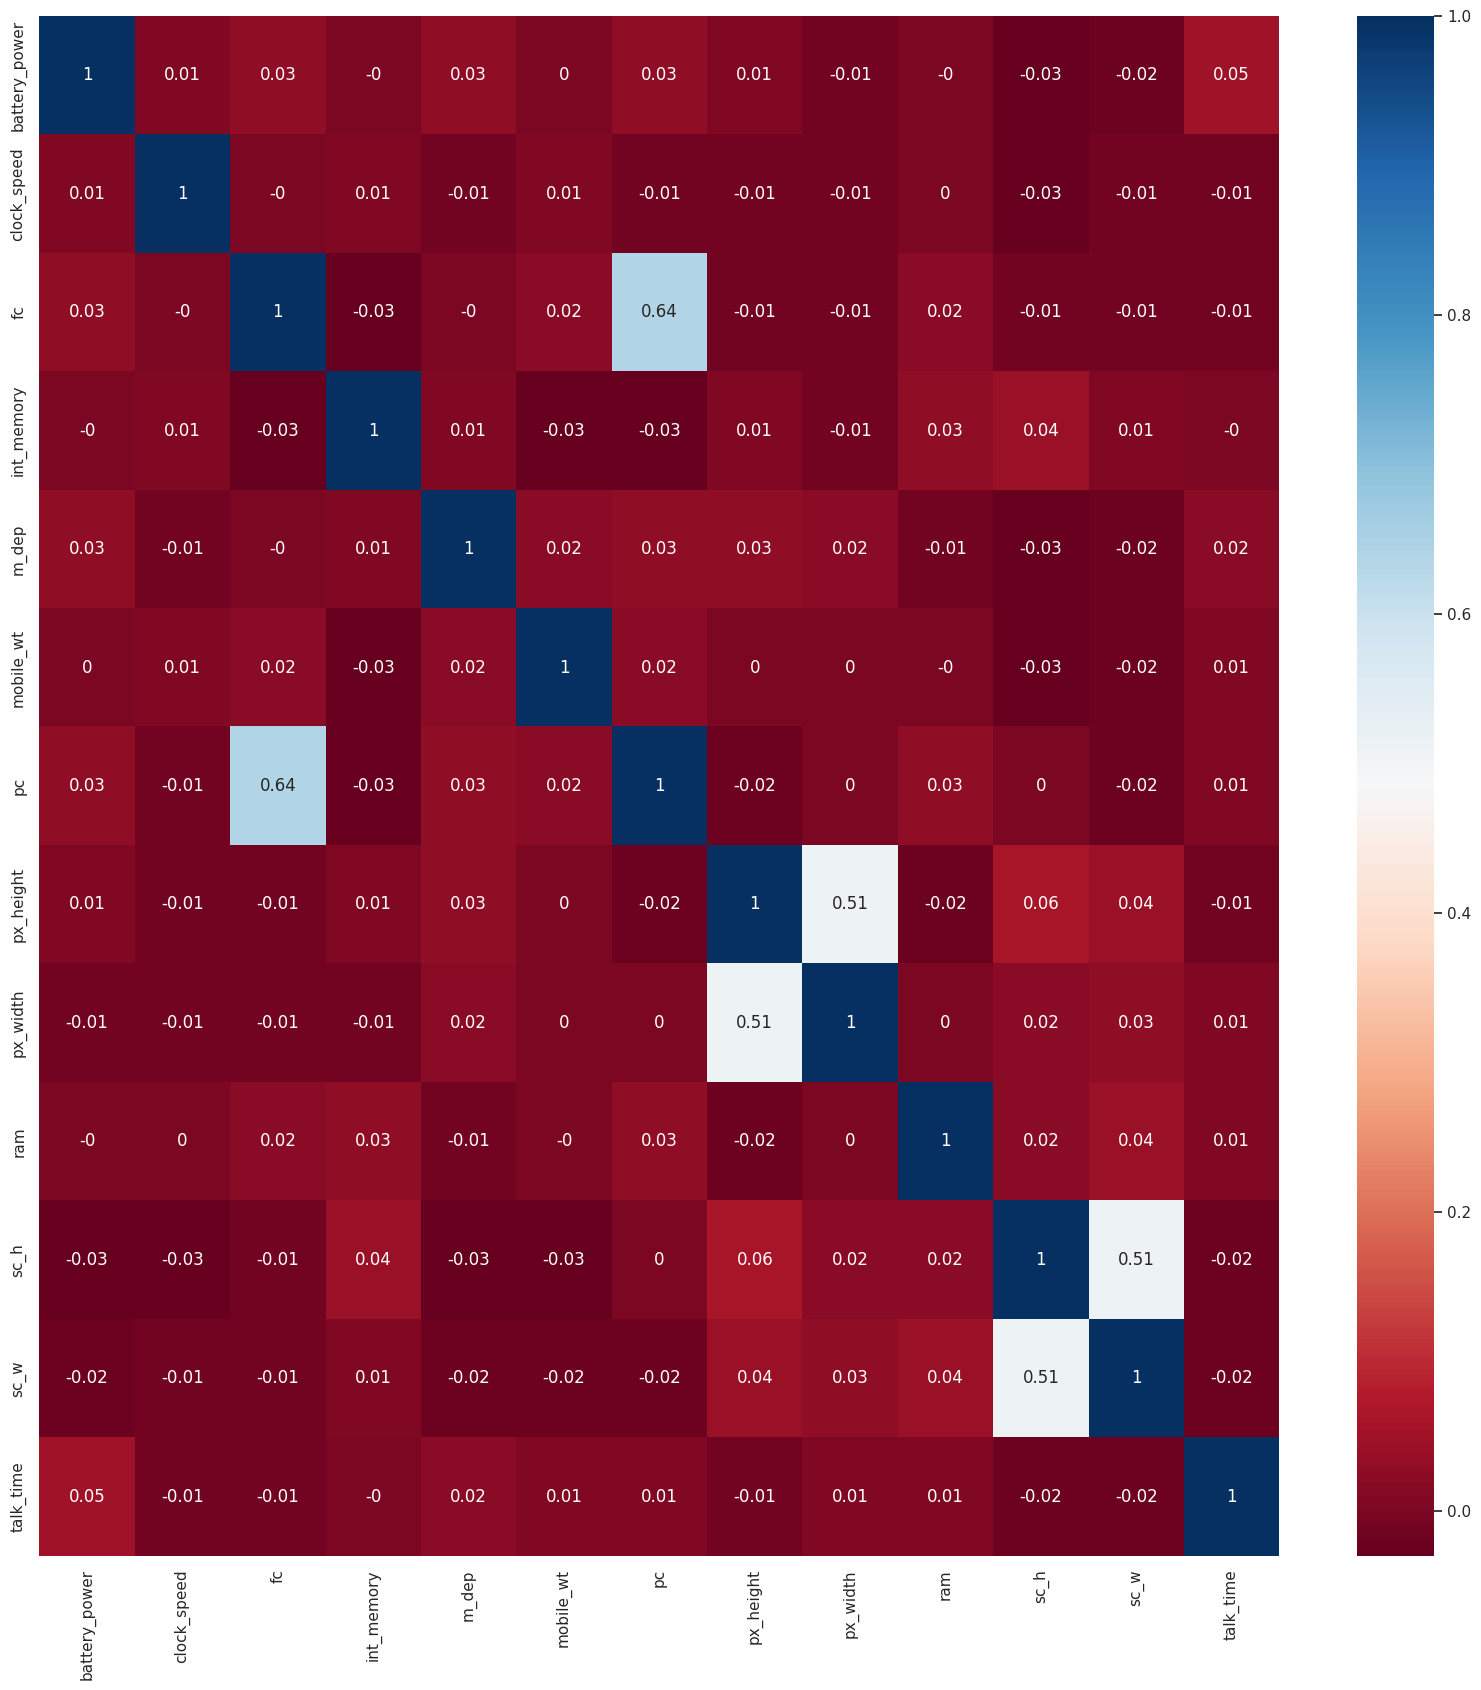

In [13]:
corr=df[num_cols].corr().round(2)
plt.figure(figsize=(20,20))

sns.heatmap(corr, cmap='RdBu', annot=True)
plt.show()

overall_h - rel
surface area- roof area
overall_h - healing_load


In [14]:
binary_cols=[col for col in df.columns if df[col].nunique()==2]
binary_cols

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [15]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
df.n_cores[0:5]

0    2
1    3
2    5
3    6
4    2
Name: n_cores, dtype: int64

In [18]:
for j in df.columns:
    print(df[j].value_counts())

battery_power
1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: count, Length: 1094, dtype: int64
blue
0    1010
1     990
Name: count, dtype: int64
clock_speed
0.50    413
2.80     85
2.30     78
2.10     76
1.60     76
2.50     74
0.60     74
1.40     70
1.30     68
1.50     67
2.00     67
1.90     65
0.70     64
2.90     62
1.80     62
1.00     61
1.70     60
2.20     59
0.90     58
2.40     58
0.80     58
1.20     56
2.60     55
2.70     55
1.10     51
3.00     28
Name: count, dtype: int64
dual_sim
1    1019
0     981
Name: count, dtype: int64
fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: count, dtype: int64
four_g
1    1043
0     957
Name: count, dtype: int64
int_memory
27    47
16    45
14    45
57    42
2     42
      ..
22    24
38    23
62    21
4     

In [19]:
df['NEW_speedy_and_perf']=df['int_memory']*df['battery_power']

df['_ALL_in']=df['dual_sim']*df['blue']*df['touch_screen']


In [20]:
df['NEW_all_in_score']=df['_ALL_in'].apply(lambda x:'all_include'if x==1 else 'not all_in')

In [21]:
df['modern']=df['four_g']*df['touch_screen']

In [22]:
df['modern'].value_counts()


modern
0    1467
1     533
Name: count, dtype: int64

In [23]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols
cat_cols, cat_but_car, num_cols=grab_col_names(df)
print('cat cols',cat_cols)
print('numeric cols',num_cols)

Observations: 2000
Variables: 25
cat_cols: 11
num_cols: 14
cat_but_car: 0
num_but_cat: 10
cat cols ['NEW_all_in_score', 'blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range', '_ALL_in', 'modern']
numeric cols ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'NEW_speedy_and_perf']


In [24]:
grab_col_names(df)
num_cols

Observations: 2000
Variables: 25
cat_cols: 11
num_cols: 14
cat_but_car: 0
num_but_cat: 10


['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'NEW_speedy_and_perf']

In [25]:
cat_cols

['NEW_all_in_score',
 'blue',
 'dual_sim',
 'four_g',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range',
 '_ALL_in',
 'modern']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   battery_power        2000 non-null   int64  
 1   blue                 2000 non-null   int64  
 2   clock_speed          2000 non-null   float64
 3   dual_sim             2000 non-null   int64  
 4   fc                   2000 non-null   int64  
 5   four_g               2000 non-null   int64  
 6   int_memory           2000 non-null   int64  
 7   m_dep                2000 non-null   float64
 8   mobile_wt            2000 non-null   int64  
 9   n_cores              2000 non-null   int64  
 10  pc                   2000 non-null   int64  
 11  px_height            2000 non-null   int64  
 12  px_width             2000 non-null   int64  
 13  ram                  2000 non-null   int64  
 14  sc_h                 2000 non-null   int64  
 15  sc_w                 2000 non-null   i

In [27]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
for col in binary_cols:
    df=label_encoder(df,col)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   battery_power        2000 non-null   int64  
 1   blue                 2000 non-null   int64  
 2   clock_speed          2000 non-null   float64
 3   dual_sim             2000 non-null   int64  
 4   fc                   2000 non-null   int64  
 5   four_g               2000 non-null   int64  
 6   int_memory           2000 non-null   int64  
 7   m_dep                2000 non-null   float64
 8   mobile_wt            2000 non-null   int64  
 9   n_cores              2000 non-null   int64  
 10  pc                   2000 non-null   int64  
 11  px_height            2000 non-null   int64  
 12  px_width             2000 non-null   int64  
 13  ram                  2000 non-null   int64  
 14  sc_h                 2000 non-null   int64  
 15  sc_w                 2000 non-null   i

In [29]:
lst=[]
for col in num_cols:
    lst.append(col)

In [30]:
lst

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'NEW_speedy_and_perf']

In [31]:
scaler = StandardScaler()
df[lst] = scaler.fit_transform(df[lst])

In [32]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,NEW_speedy_and_perf,_ALL_in,NEW_all_in_score,modern
0,-0.90,0,0.83,0,-0.76,0,-1.38,0.34,1.35,2,...,0.28,1.46,0,0,1,1,-1.23,0,not all_in,0
1,-0.50,1,-1.25,1,-0.99,1,1.16,0.69,-0.12,3,...,-0.64,-0.73,1,1,0,2,0.53,1,all_include,1
2,-1.54,1,-1.25,1,-0.53,1,0.49,1.38,0.13,5,...,-0.86,-0.37,1,1,0,2,-0.60,1,all_include,1
3,-1.42,1,1.20,0,-0.99,0,-1.22,1.03,-0.26,6,...,0.51,-0.00,1,0,0,2,-1.22,0,not all_in,0
4,1.33,1,-0.40,0,2.00,1,0.66,0.34,0.02,2,...,-0.86,0.73,1,1,0,1,1.47,0,not all_in,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.01,1,-1.25,1,-0.99,1,-1.66,1.03,-0.97,6,...,-0.41,1.46,1,1,0,0,-1.39,1,all_include,1
1996,1.65,1,1.32,1,-0.99,0,0.38,-1.05,1.32,4,...,0.97,0.91,1,1,1,2,1.35,1,all_include,0
1997,1.53,0,-0.76,1,-0.76,1,0.22,0.69,-0.91,8,...,-1.09,-1.10,1,1,0,3,1.06,0,not all_in,1
1998,0.62,0,-0.76,0,-0.07,1,0.77,-1.39,0.13,5,...,0.97,1.46,1,1,1,0,1.09,0,not all_in,1


In [33]:
cat_cols

['NEW_all_in_score',
 'blue',
 'dual_sim',
 'four_g',
 'n_cores',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range',
 '_ALL_in',
 'modern']

In [34]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["price_range"]]  #BUNU CIKARMAN GEREK YOKSA 
cat_cols




['NEW_all_in_score', 'n_cores', '_ALL_in', 'modern']

In [35]:

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,pc,...,NEW_all_in_score_not all_in,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8,_ALL_in_1,modern_1
0,-0.90,0,0.83,0,-0.76,0,-1.38,0.34,1.35,-1.31,...,True,True,False,False,False,False,False,False,False,False
1,-0.50,1,-1.25,1,-0.99,1,1.16,0.69,-0.12,-0.65,...,False,False,True,False,False,False,False,False,True,True
2,-1.54,1,-1.25,1,-0.53,1,0.49,1.38,0.13,-0.65,...,False,False,False,False,True,False,False,False,True,True
3,-1.42,1,1.20,0,-0.99,0,-1.22,1.03,-0.26,-0.15,...,True,False,False,False,False,True,False,False,False,False
4,1.33,1,-0.40,0,2.00,1,0.66,0.34,0.02,0.67,...,True,True,False,False,False,False,False,False,False,True


In [36]:
y=df['price_range']
X=df.drop('price_range',axis=1)

In [37]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [46]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {recall_score(y_pred,y_test)}",average='macro')  #why?
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}",average="macro")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}",average="macro")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}",average="macro")


Accuracy: 0.86


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [47]:
classifiers = [
               ['LogisticRegression :', LogisticRegression(C=545.5594781168514, random_state=42)],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))


LogisticRegression : 0.97
DecisionTree : 0.8316666666666667
RandomForest : 0.8633333333333333
KNeighbours : 0.5733333333333334
SVM : 0.905
GradientBoostingClassifier:  0.89
XGB : 0.895
